# Probability distribution


All the distributions available in scipy can be found on the docs here: http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats


Some examples taken from: https://gist.github.com/mattions/6113437



## Discrete Distributions

* bernoulli
* binomial
* poisson
* ...



In [1]:


import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
plt.style.use('ggplot')


from scipy.stats import bernoulli, poisson, binom, geom

### Bernoulli distribution


Given a certain success probability $p$, the Bernoulli distribution takes value $k=1$, meanwhile 
it takes $k=0$ in all the other cases $q = 1-p$. The outcome of one experiment(single coin toss) can be described by a Bernoulli distribution. What is the probability of head?

In other words:

$$
f(k;p) = \begin{cases}
    p & \text{if } k=1 \\\\ 
    1-p & \text{if } k=0
\end{cases}
$$

The mean is p.

The median is
$$
f(k;p) = \begin{cases}
    0 & \text{if } p < q \\\\ 
    0.5 & \text{if } p==q
    \\\\ 
    1 & \text{if } p > q
\end{cases}
$$


The mode (most frequent value) is
$$
f(k;p) = \begin{cases}
    0 & \text{if } p < q \\\\ 
    0, 1 & \text{if } p==q
    \\\\ 
    1 & \text{if } p > q
\end{cases}
$$

The variance is $p*(1-p)$.

In [2]:
p = 0.3
n = 10
observations = bernoulli.rvs(p, size=n)
print(observations)

[0 1 0 0 0 0 0 0 1 1]


[0 1]
Counter({0: 7, 1: 3})


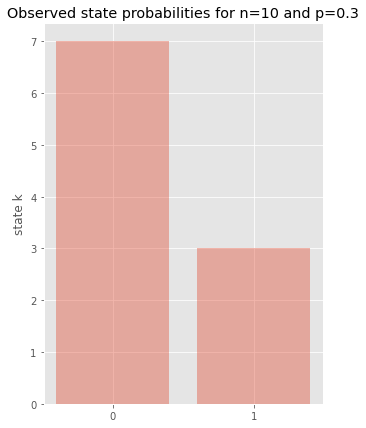

In [3]:
from collections import Counter

x = np.arange(2)
print (x)
state_frequencies = Counter(observations)
print(state_frequencies)

plt.figure(figsize=(5,7))
plt.bar(list(state_frequencies.keys()), list(state_frequencies.values()), align='center', alpha=0.4)
plt.xticks(x, x)
plt.ylabel('state k')
plt.title(f'Observed state probabilities for n={n} and p={p}')
plt.show()

In [4]:
# describe sample
print(observations)
print(np.mean(observations))
print(np.median(observations))
print(np.var(observations)) # p*(1-p)
print(np.std(observations))

# mode
state_frequencies = Counter(bernoulli.rvs(p, size=n))
print(state_frequencies)
print(state_frequencies.most_common(1))

[0 1 0 0 0 0 0 0 1 1]
0.3
0.0
0.21000000000000002
0.45825756949558405
Counter({0: 5, 1: 5})
[(0, 5)]


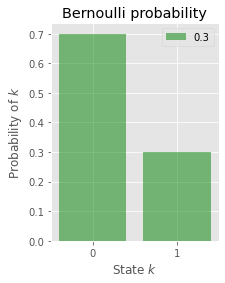

In [5]:
plt.figure(figsize=(3,4))
plt.bar(x, bernoulli.pmf(x, p), label=p, color=["green"],  align='center',  alpha=0.5)
plt.xticks(x, x)
plt.legend(loc=0)
plt.ylabel("Probability of $k$")
plt.xlabel("State $k$")
plt.title("Bernoulli probability")
plt.show()

In [6]:
# describe distribution 

print(bernoulli.mean(p))
print(bernoulli.median(p))

mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print(mean, var, skew, kurt)

0.3
0.0
0.3 0.21 0.8728715609439694 -1.2380952380952381


In [7]:
print(p)
print(bernoulli.cdf(x, p))


0.3
[0.7 1. ]


### Binomial distribution

If one experiment (e.g. coin toss) consists of several trials (n>1) then the outcome can be described with a binomial distribution. What is the probability to observe k heads in n trails?

Binomial distribution which is defined as:
$$f(k;n,p) = Pr(X = k) = {n \choose k} p^k (1-p)^{(n-k)}$$

where 

$${n \choose k} = \frac{n!}{k!(n-k)!}$$

with $k={1, 2, 3, \ldots}$



The mean and median are $np$.
The variance is $np*(1-p)$.


In [8]:
p=0.5
n=10 # 10 trails per experiment
# 2^5 possible outcomes
# n+1 --> state space size for each experiment
numexps = 500
observations = binom.rvs(n, p, size=numexps) 
print(observations)

[4 6 6 6 5 5 6 7 3 2 2 7 5 4 5 4 2 4 6 5 5 6 6 3 6 9 5 3 6 4 4 6 6 3 5 3 7
 5 6 3 6 5 7 1 6 2 5 7 5 7 7 2 6 3 6 5 5 6 9 6 4 6 7 6 4 5 4 5 4 5 7 6 5 3
 5 3 5 4 6 5 2 4 4 4 8 3 4 5 4 7 7 7 4 6 5 6 6 3 2 2 7 3 8 4 6 6 4 6 4 3 4
 5 3 7 6 4 6 5 5 5 5 5 5 4 5 7 4 5 4 2 6 5 5 6 6 5 3 3 5 5 4 7 4 5 5 4 5 4
 7 5 5 6 2 4 4 6 6 2 4 5 5 4 2 4 7 7 6 6 4 5 8 3 5 3 3 5 7 7 6 5 6 4 6 6 6
 7 7 7 4 5 8 3 4 4 7 2 4 5 5 6 3 4 7 6 3 7 3 4 8 4 4 7 4 3 5 5 2 8 4 6 7 7
 8 5 2 4 4 6 7 4 3 4 3 5 4 6 6 6 4 5 4 7 6 3 4 7 5 7 8 2 6 3 4 5 5 4 6 6 5
 7 6 6 6 4 5 6 3 5 4 2 3 6 6 5 6 2 5 5 6 5 3 5 3 4 5 6 3 4 4 6 6 4 2 4 4 3
 3 9 6 6 5 4 7 3 8 2 5 6 3 5 6 4 2 5 5 7 4 2 5 2 4 5 7 4 6 4 4 4 7 9 3 5 7
 4 3 2 6 4 5 5 3 4 5 6 7 6 1 6 5 5 7 4 8 5 3 6 5 3 5 5 1 3 2 7 8 5 4 2 2 7
 3 2 3 4 7 5 3 4 5 6 4 6 6 6 5 7 5 5 5 3 4 3 3 3 8 4 8 5 4 8 3 2 7 4 3 6 5
 3 5 6 4 4 4 5 5 4 6 4 5 1 4 7 3 3 4 8 6 8 3 5 3 6 3 6 8 7 4 6 5 6 6 3 6 3
 3 6 4 6 7 8 5 6 4 3 5 5 4 3 5 5 6 6 7 2 4 2 6 4 5 8 7 6 3 4 4 6 7 4 6 8 4
 4 6 6 5 6 4 6 6 6 6 5 2 

[ 0  1  2  3  4  5  6  7  8  9 10]
Counter({5: 109, 6: 108, 4: 104, 3: 64, 7: 54, 2: 33, 8: 20, 9: 4, 1: 4})


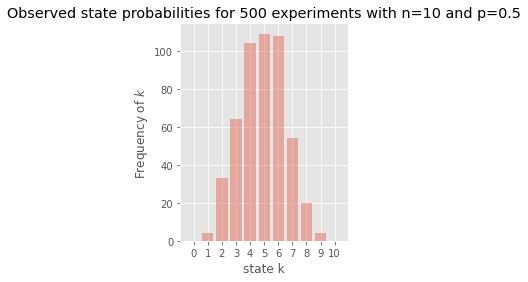

In [9]:
from collections import Counter


x = np.arange(n+1)
print (x)

state_frequencies = Counter(observations)
print(state_frequencies)

states = dict()
for i in x:
    if i not in state_frequencies:
        states[i] = 0
    else:
        states[i] = state_frequencies[i]
    
plt.figure(figsize=(3,4))
plt.bar(list(states.keys()), list(states.values()), align='center', alpha=0.4)
plt.xticks(x, x)
plt.ylabel("Frequency of $k$")
plt.xlabel('state k')
plt.title('Observed state probabilities for %s experiments with n=%s and p=%s'%(numexps, n, p))
plt.show()

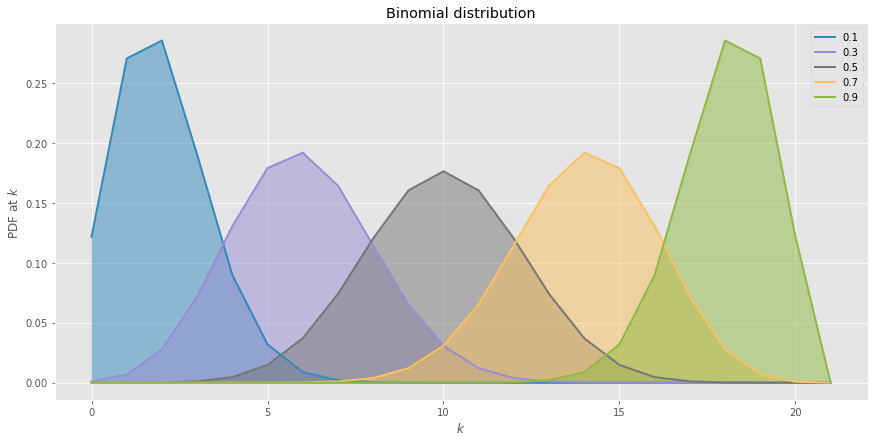

In [10]:
plt.figure(figsize=(12,6))

colors = [f"C{i}" for i in range(1,6)]

n=20

k = np.arange(0, 22)
for p, color in zip([0.1, 0.3, 0.5, 0.7, 0.9], colors):
    # n is number of trails, p success probability
    rv = binom(n, p)
    plt.plot(k, rv.pmf(k), lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")
plt.show()

### Poisson Distribution


The Poisson Distribution can be used to model count data (i.e., how often does an event occur in an interval). It is often used to model the occurence of rare events.


* Events must occur independently. 
* Probability of an event in an interval is proportional to the length of the interval.
* The rate at which events occur is constant. The rate cannot be higher in some intervals and lower in other intervals.



It is defined for all positive integer numbers as follows:

$$P(Z=k)=\frac{λ^ke^{−λ}}{k!}, k=0,1,2,... \ldots$$


* For example: Luckily floods do not occur often. There is only around 1 flood every 100 years. The constant rate with which the event occurs in our interval is $λ=1$.
* λ also defines the mean and variance of the Poisson distribution.
* k defines the number of events that happened during the interval. The poisson distribution can give us the number of times we have to flip the coin until we observe k events (the expected waiting time). K defines when we stop.






In [11]:
lambda_ = 1
observations = poisson.rvs(lambda_, size=200)
print(observations)

[1 1 2 1 4 2 1 0 1 1 0 2 0 2 0 1 1 0 0 0 1 1 0 1 1 0 0 1 2 3 0 0 1 0 1 0 1
 1 1 1 0 3 2 1 0 1 2 0 1 1 0 0 1 0 2 2 0 2 1 0 0 2 0 0 0 1 2 1 0 1 0 1 1 1
 2 0 0 1 2 1 0 2 2 1 2 1 0 2 3 0 1 2 2 2 1 2 2 4 0 3 3 0 1 0 0 0 2 1 0 1 0
 1 0 0 0 0 2 2 1 2 0 2 1 0 0 2 1 3 2 2 0 0 1 1 1 2 3 1 2 1 0 1 4 0 1 2 2 3
 0 0 0 1 0 2 1 0 1 1 1 1 0 2 1 1 1 5 1 0 1 2 1 1 0 0 0 2 0 0 1 2 0 1 1 0 0
 2 0 0 0 1 0 2 1 1 1 2 2 2 2 1]


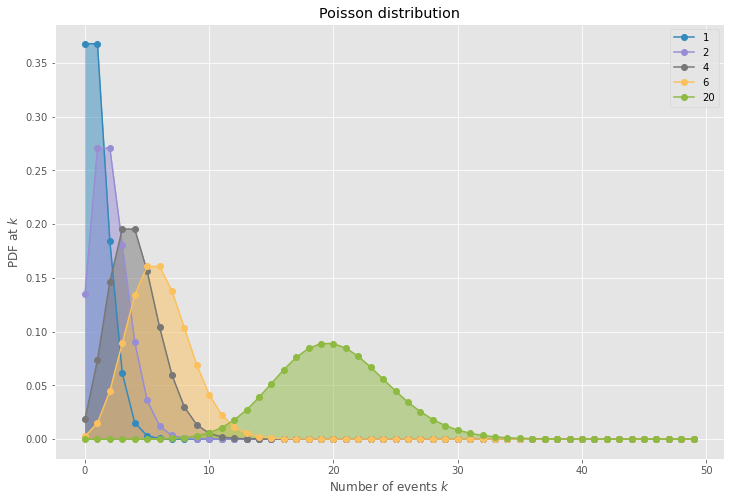

In [12]:
k = np.arange(0, 50)

plt.figure(figsize=(12,8))

# lambda defined mean and variance of distribution
for i, lambda_ in enumerate([1, 2, 4, 6, 20]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()

plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("Number of events $k$")
plt.show()

## Continous Probability Distribution


They are defined for any value of a positive $x$. 

* gauss
* exponential
* ...



### Normal Distribution 

Many things, including various types of measurement errors, are normally distributed.

Also if draw samples from a hidden population and measure e.g. the sample mean, we expect to get results that deviate from the true parameter. However we know that they deviate in a specific way, namely often as follows:

* About 68% of values drawn from a normal distribution are within 1 standard deviation away from the mean; 
* about 95% of the values lie within 2 standard deviations; 
* and about 99.7% are within 3 standard deviations.

The standard normal distribution has mean=0 and variance=1.






[-0.8114701  -0.49491474 -0.13204427 -0.41432077 -0.68580157  0.80734644
  1.59301711  0.29533475  0.54529794  0.29786761  0.28878657  0.87220916
 -0.92710744  0.36517228  0.24846138 -0.47513165  0.67824007  0.52186001
 -0.47220767  0.89959236 -0.85632059 -0.62701805  1.1453646  -0.69399385
 -2.86800893  2.36647253  0.49677039 -1.62511318 -0.23478516 -0.14816611
  0.83845339 -0.38899685  1.43582784 -0.61725772 -0.2483447  -0.24165901
  0.27968545 -0.17213746  0.98937008  0.35447335 -0.24814576  0.54943701
 -0.36366988  2.31026092 -0.48550569  1.04869494 -0.82799048 -1.33411748
  0.54933641 -0.56684577 -0.57353003 -1.52109504  0.67190224 -0.49541231
 -0.38816346 -2.1162305   0.94830073  1.0612646   1.06160438  0.6089656
  0.6946661   0.6671898  -1.29812353 -0.66799043 -1.07446223  1.58647768
  0.46612488  0.0319818  -0.38797352 -0.67730369 -0.78329097  0.81449336
 -0.22546071 -1.54679785  0.65631048 -0.97392368 -0.05678956  0.72082672
 -0.86670568 -0.31768081  0.81657745  0.01792783  1.

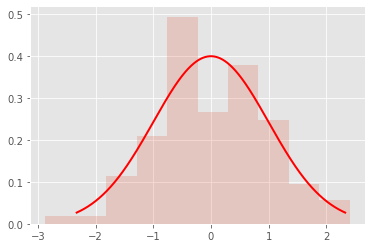

mean:0.0, var:1.0, skew:0.0, kurtusis:0.0


In [13]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)


# sample 100 points from a standard normal 
#  The scale (scale) keyword specifies the standard deviation
points = norm.rvs(loc = 0, scale = 1, size=100)
print (points)

ax.hist(points, density=True, histtype='stepfilled', alpha=0.2)


x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
ax.plot(x, norm.pdf(x), 'k-', lw=2, label='frozen pdf',color="red") 

plt.show()

mean, var, skew, kurt = norm.stats(loc = 0, scale = 1, moments='mvsk')
print("mean:%s, var:%s, skew:%s, kurtusis:%s" %(mean, var, skew, kurt))


Skewness is a measure of the lack of symmetry. A normal distribution which is symmetric has a skewness=0.

Negative values for the skewness indicate data that are skewed left. Positive values indicate right skew. 

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

Normal distribution has a kurtosis=0. A flatter distribution has a negative kurtosis. A more peaked distribution has a positive kurtosis. 

#### What is the probability of observing value x?

In [14]:
# mean = 0
# std = 1
# what is the probability of x = 0
print(norm(0, 1).pdf(0))

# what is the probability of x = 3
print(norm(0, 1).pdf(3))

# what is the probability of x = -3
print(norm(0, 1).pdf(-3))


0.3989422804014327
0.0044318484119380075
0.0044318484119380075


#### Cumulative Distribution
Cumulative distribution function (CDF) of a discrete random variable X is the probability that X will take a value less than or equal to x.
In the case of a continuous distribution, it gives the area under the probability density function from minus infinity to x. 


Percent point function (PPF) or inverse cumulative function: just switch x and y axis in CDF plot.
Gives the value of the x for which the cumulative probability has a certain value. 

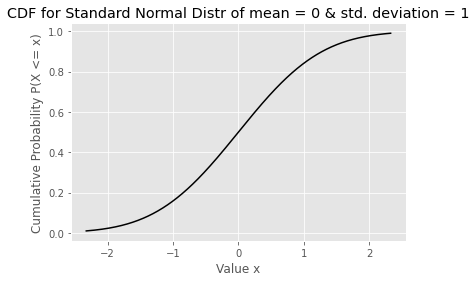

In [15]:
mean = 0
std = 1
y = norm.cdf(x, loc=mean, scale=std) 

plt.plot(x,y, color="black")
plt.xlabel("Value x")
plt.ylabel("Cumulative Probability P(X <= x)")
plt.title("CDF for Standard Normal Distr of mean = {0} & std. deviation = {1}".format(mean, std))
plt.draw()

Exponential
-----------

The Exponantial probability function is

$$ f_X(x|λ) = λ e^{−λx} , \, x≥0$$

Therefore, the random variable X has an exponential distribution with parameter λ, we say X is exponential and write

$$ X∼Exp(λ) $$

Given a specific λ, the expected value of an exponential random variable is equal to the inverse of λ, that is:

$$ E[X|λ]= \frac{1}{λ} $$

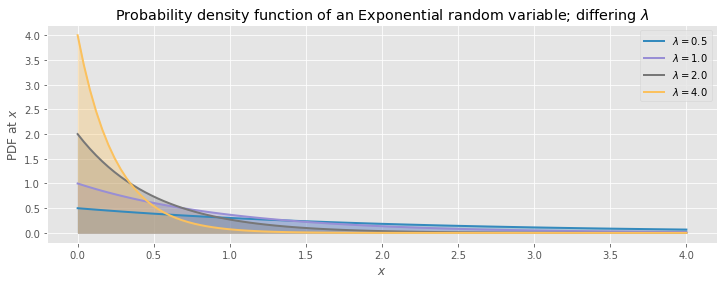

In [16]:
x = np.linspace(0,4, 100)
expo = scipy.stats.expon
lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_,colors):
    plt.plot(x, expo.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expo.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");